## CN_hist
- read in and plot global transient results
- data are here /project/tss/wwieder/biogeochem_testbed_1.1/GRID_CN/MIMICS/OUTPUT_CN/SPIN

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import utils
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

# some resources for plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

print(xr.__version__)
%matplotlib inline

0.16.1


### Point to the datasets

In [2]:
import pandas.util.testing as tm
path  = '/project/tss/wwieder/biogeochem_testbed_1.1/GRID_CN/'
outCN = '/OUTPUT_CN/HIST/'
outC  = '/OUTPUT_C/HIST/'
year  = '2014' 

# CASA CN
CASsimCN = 'CASACNP_mod4_GSWP3'
pathCAScn = path+CASsimCN+outCN+'casaclm_pool_flux_'+year+'_daily.nc' 
pathCAScnANN = path+CASsimCN+outCN+'ann_casaclm_pool_flux_1901_2014.nc' 

# CASA C only
CASsimC = 'CASACNP_mod4_Conly'
pathCASc = path+CASsimC+outC+'casaclm_pool_flux_'+year+'_daily.nc' 
pathCAScANN = path+CASsimC+outC+'ann_casaclm_pool_flux_1901_2014.nc' 


# MIMICS CN
MIMsimCN = 'MIMICS_mod4_dens1.0_KO6_micCN_GSWP3_hist'
pathMIMcn = path+MIMsimCN+outCN+'mimics_pool_flux_'+year+'_daily.nc'  
pathMIMcn2= path+MIMsimCN+outCN+'casaclm_pool_flux_'+year+'_daily.nc'  
pathMIMcnANN = path+MIMsimCN+outCN+'ann_mimics_pool_flux_1901_2014.nc'  
pathMIMcn2ANN= path+MIMsimCN+outCN+'ann_casaclm_pool_flux_1901_2014.nc'  
print(pathMIMcn)
print(pathMIMcnANN)

# MIMICS C only
MIMsimC  = 'MIMICS_mod4_dens1.0_KO6_Conly'
pathMIMc = path+MIMsimC+outC+'mimics_pool_flux_'+year+'_daily.nc'  
pathMIMc2= path+MIMsimC+outC+'casaclm_pool_flux_'+year+'_daily.nc'  
pathMIMcANN = path+MIMsimC+outC+'ann_mimics_pool_flux_1901_2014.nc'  
pathMIMc2ANN= path+MIMsimC+outC+'ann_casaclm_pool_flux_1901_2014.nc'  

/project/tss/wwieder/biogeochem_testbed_1.1/GRID_CN/MIMICS_mod4_dens1.0_KO6_micCN_GSWP3_hist/OUTPUT_CN/HIST/mimics_pool_flux_2014_daily.nc
/project/tss/wwieder/biogeochem_testbed_1.1/GRID_CN/MIMICS_mod4_dens1.0_KO6_micCN_GSWP3_hist/OUTPUT_CN/HIST/ann_mimics_pool_flux_1901_2014.nc


/home/wwieder/.conda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


#### Open datasets and combine MIMICS output into one file

In [8]:
# CASAcn
CAScn  = xr.open_mfdataset(pathCAScn, decode_times=True, combine='by_coords')
CAScnANN  = xr.open_mfdataset(pathCAScnANN, decode_times=True, combine='by_coords')
#CASAc only
CASc  = xr.open_mfdataset(pathCASc, decode_times=True, combine='by_coords')
CAScANN  = xr.open_mfdataset(pathCAScANN, decode_times=True, combine='by_coords')

# MIMICScn
MIMcn1 = xr.open_mfdataset(pathMIMcn, decode_times=True, combine='by_coords')
MIMcn2 = xr.open_mfdataset(pathMIMcn2, decode_times=True, combine='by_coords')
MIMcn = xr.combine_by_coords([MIMcn1, MIMcn2], compat='override',combine_attrs='override')
MIMcn1ANN = xr.open_mfdataset(pathMIMcnANN, decode_times=True, combine='by_coords')
MIMcn2ANN = xr.open_mfdataset(pathMIMcn2ANN, decode_times=True, combine='by_coords')
MIMcnANN = xr.combine_by_coords([MIMcn1ANN, MIMcn2ANN], compat='override',combine_attrs='override')
# MIMICSc only
MIMc1 = xr.open_mfdataset(pathMIMc, decode_times=True, combine='by_coords')
MIMc2 = xr.open_mfdataset(pathMIMc2, decode_times=True, combine='by_coords')
MIMc = xr.combine_by_coords([MIMc1, MIMc2], compat='override',combine_attrs='override')
MIMc1ANN = xr.open_mfdataset(pathMIMcANN, decode_times=True, combine='by_coords')
MIMc2ANN = xr.open_mfdataset(pathMIMc2ANN, decode_times=True, combine='by_coords')
MIMcANN = xr.combine_by_coords([MIMc1ANN, MIMc2ANN], compat='override',combine_attrs='override')
print('-- read in dataset -- ')

-- read in dataset -- 


#### Sum soil C & N pools

In [9]:
# Single annual cycle:
CAScn = utils.sum_pools(CAScn,'cas',CN='True')
CASc  = utils.sum_pools(CASc, 'cas',CN='False')
MIMcn = utils.sum_pools(MIMcn,'mim',CN='True')
MIMc  = utils.sum_pools(MIMc, 'mim',CN='False')

# Full transient time series (annual mean) 
CAScnANN = utils.sum_pools(CAScnANN,'cas',CN='True')
CAScANN  = utils.sum_pools(CAScANN, 'cas',CN='False')
MIMcnANN = utils.sum_pools(MIMcnANN,'mim',CN='True')
MIMcANN  = utils.sum_pools(MIMcANN, 'mim',CN='False')

In [5]:
# get correct respiration flux onto MIMICS output
MIMcn['cresp']   = MIMcn['cHresp']
MIMcnANN['cresp']= MIMcnANN['cHresp']
MIMc['cresp']    = MIMc['cHresp']
MIMcANN['cresp'] = MIMcANN['cHresp']


In [14]:
MIMcnANN['cnR'] = MIMcnANN.cMICr / MIMcnANN.nMICr
MIMcnANN['cnK'] = MIMcnANN.cMICk / MIMcnANN.nMICk
MIMcnANN['cnR'].attrs['long_name'] = 'r C:N'
MIMcnANN['cnK'].attrs['long_name'] = 'K C:N'

#### Quick look at seasonal cycle in one grid cell

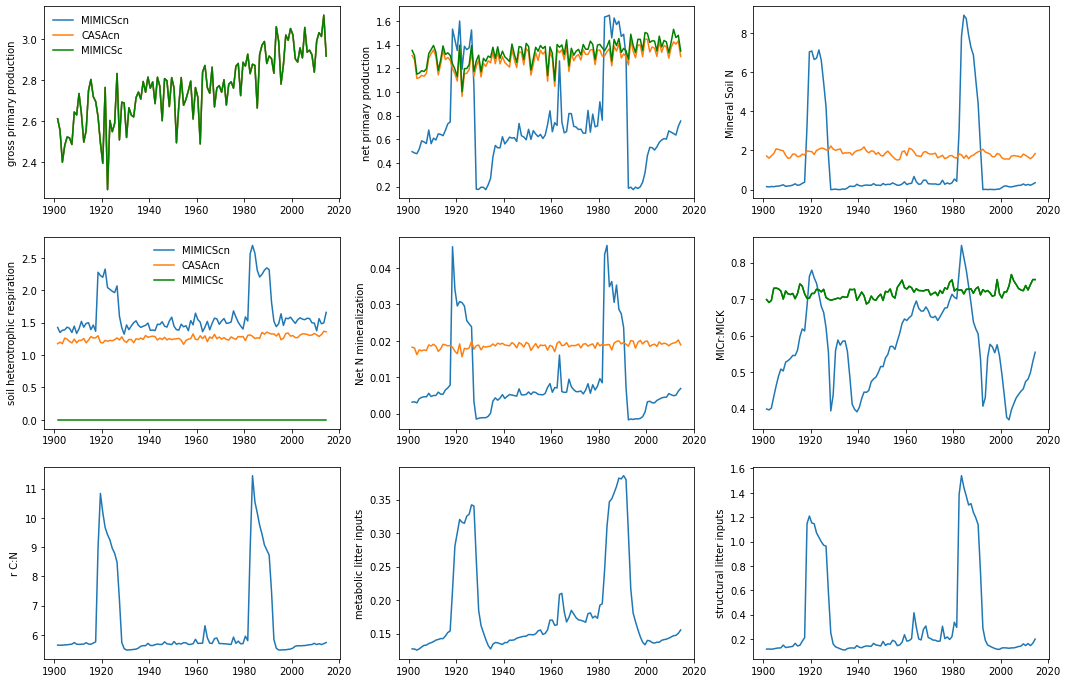

In [18]:
tlat = 54  #65, 40
tlon = 237  #30, 282
var = ['cgpp','cnpp','nMineral',
       'cresp','nNetMineralization','MICrK',
      'cnR','cLitInput_metb','cLitInput_struc']
nvar = len(var)

# subset data for grid
ptCAScn = CAScnANN.sel(lat=tlat, lon=tlon, method='nearest')#.isel(time=slice(0,5*365))
ptCASc  = CAScANN.sel(lat=tlat, lon=tlon, method='nearest')#.isel(time=slice(0,5*365))
ptMIMcn = MIMcnANN.sel(lat=tlat, lon=tlon, method='nearest')#.isel(time=slice(0,5*365))
ptMIMc  = MIMcANN.sel(lat=tlat, lon=tlon, method='nearest')#.isel(time=slice(0,5*365))

plt.figure(figsize=[18,12]);
for i in range(nvar):
    plt.subplot(3, 3, (1+i))
    plt.plot(ptMIMcn['time'], ptMIMcn[var[i]])
    plt.ylabel(ptMIMcn[var[i]].attrs['long_name'])#+' ('+ptMIMcn[var[i]].attrs['units']+')')

    if i < 5: 
        plt.plot(ptCAScn['time'], ptCAScn[var[i]]);
        
    if i==0 or i==1 or i==3 or i==5: 
        plt.plot(ptMIMc['time'], ptMIMc[var[i]], color='g');
    if i==5:     
        plt.plot(ptMIMc['time'], ptMIMc[var[i]], color='g');
    if i==0 or i == 3:
        plt.legend(labels=['MIMICScn','CASAcn','MIMICSc','CASAc'], frameon = False, fontsize='medium')

### Global plots & change over time

In [14]:
def globalSum ( varIn, area=MIMcnANN.landarea *1e6, timeC=1, conversion=1e-15, units=None, pt=False):
    "Global weighted sum of fluxes & states"
    temp = varIn * area 
    temp = temp.sum(dim=('lat','lon')) * conversion * timeC
    if pt==True:
        print(varIn.attrs['long_name']+' '+str(np.round(temp.values,1))+' Pg C')
    return(temp)

In [15]:
d2y = 365
print('MIMICS cn')
globalSum(MIMcnANN['cgpp'].isel(time=0),timeC=d2y, pt=True)
globalSum(MIMcnANN['cnpp'].isel(time=0),timeC=d2y, pt=True)
globalSum(MIMcnANN['cTOT'].isel(time=0), pt=True);

MIMICS cn
gross primary production 105.2 Pg C
net primary production 36.3 Pg C
sum of all pools 1443.5 Pg C


In [16]:
tot = globalSum(MIMcnANN['cTOT'])
tot

<xarray.DataArray (time: 114)>
dask.array<mul, shape=(114,), dtype=float32, chunksize=(114,)>
Coordinates:
  * time     (time) float32 1901.5013 1902.5013 ... 2013.5013 2014.5013

In [17]:
'''model = ['MIMcn','CAScn','MIMc']
# create dataset for global sums
ds = xr.Dataset( coords={'model': model,
                         'time': tot.time})

# variables to sum globally
din = ['cgpp','cnpp','cTOT']

# loop over variables for each model
for i in range(len(din)):
    print(i)
    ds[din[i]].isel(model=0) = globalSum(MIMcnANN[din[i]]).values
    ds[din[i]].isel(model=1) = globalSum(CAScnANN[din[i]]).values
    ds[din[i]].isel(model=2) = globalSum(MIMcANN[din[i]]).values    '''

"model = ['MIMcn','CAScn','MIMc']\n# create dataset for global sums\nds = xr.Dataset( coords={'model': model,\n                         'time': tot.time})\n\n# variables to sum globally\ndin = ['cgpp','cnpp','cTOT']\n\n# loop over variables for each model\nfor i in range(len(din)):\n    print(i)\n    ds[din[i]].isel(model=0) = globalSum(MIMcnANN[din[i]]).values\n    ds[din[i]].isel(model=1) = globalSum(CAScnANN[din[i]]).values\n    ds[din[i]].isel(model=2) = globalSum(MIMcANN[din[i]]).values    "

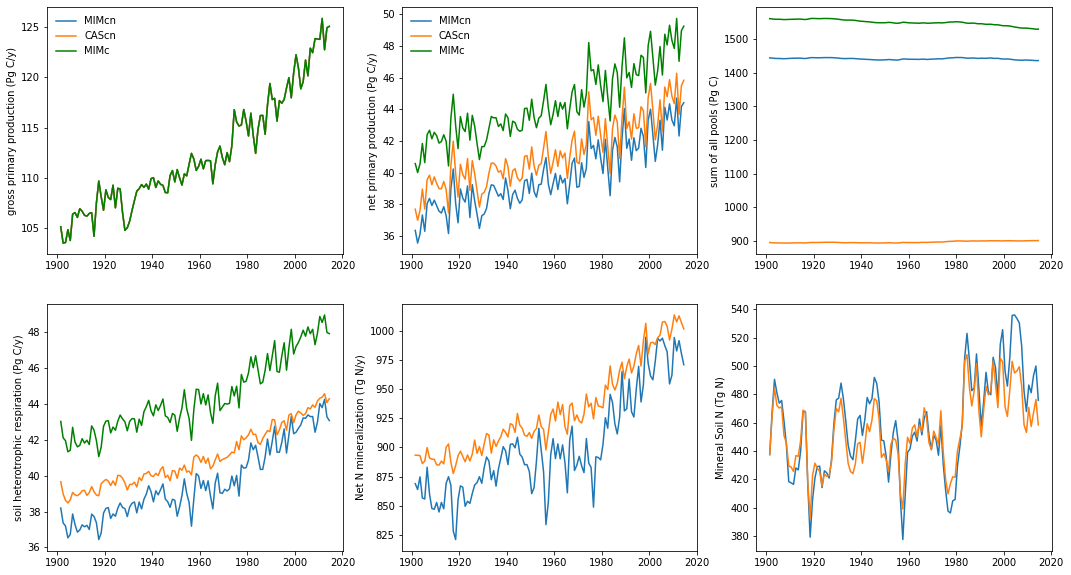

In [18]:
model = ['MIMcn','CAScn','MIMc']
var = ['cgpp','cnpp','cTOT',
       'cresp','nNetMineralization','nMineral']
nvar  = len(var)
timeC = [365,365,1,365,365,1]
conversion = [1e-15,1e-15,1e-15,1e-15,1e-12,1e-12]
units = ['(Pg C/y)','(Pg C/y)','(Pg C)',
         '(Pg C/y)','(Tg N/y)','(Tg N)']

plt.figure(figsize=[18,10]);
for i in range(nvar):
    plt.subplot(2, (nvar/2), (1+i))
    plt.plot(tot.time, globalSum(MIMcnANN[var[i]],
                                 timeC=timeC[i],conversion=conversion[i]))
    plt.ylabel(MIMcnANN[var[i]].attrs['long_name']+' '+units[i])
    plt.plot(tot.time, globalSum(CAScnANN[var[i]],
                                     timeC=timeC[i],conversion=conversion[i]))        
    if i<=3: 
        plt.plot(tot.time, globalSum(MIMcANN[var[i]],
                                     timeC=timeC[i],conversion= conversion[i]), color='g')
        
    if i<2:
        plt.legend(labels=model, frameon = False, fontsize='medium')

#### Plot changes since start of simulation

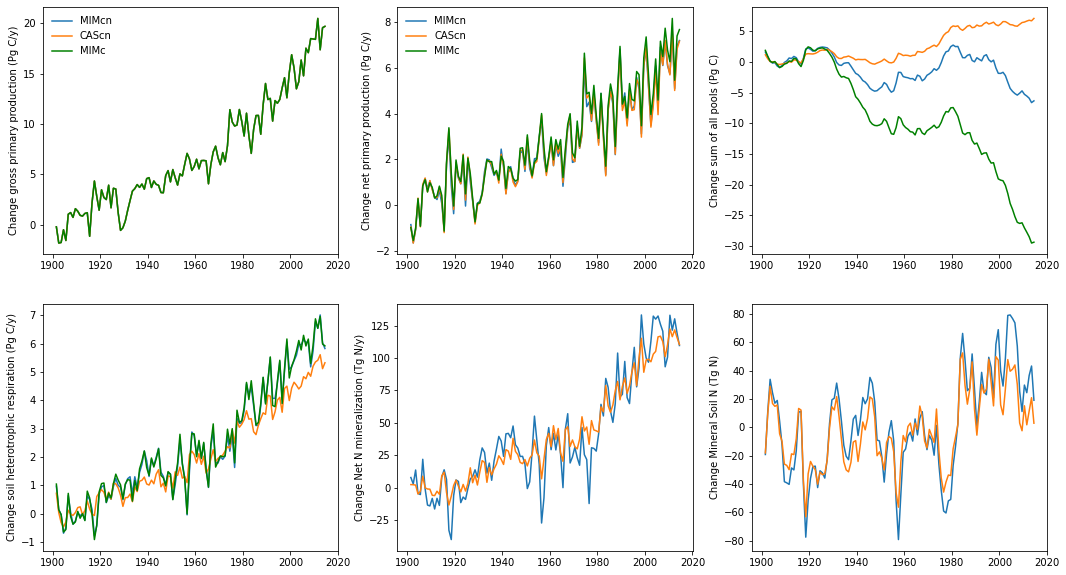

In [19]:
plt.figure(figsize=[18,10]);
for i in range(nvar):
    plt.subplot(2, (nvar/2), (1+i))
    daMIMcn = globalSum(MIMcnANN[var[i]],timeC=timeC[i],conversion=conversion[i])
    daCAScn = globalSum(CAScnANN[var[i]],timeC=timeC[i],conversion=conversion[i])
    plt.plot(daMIMcn.time, (daMIMcn-daMIMcn.isel(time=slice(0,10)).mean())) 
    plt.ylabel('Change '+MIMcnANN[var[i]].attrs['long_name']+' '+units[i])
    plt.plot(daMIMcn.time,(daCAScn-daCAScn.isel(time=slice(0,10)).mean()) )        
    if i<=3: 
        daMIMc = globalSum(MIMcANN[var[i]],timeC=timeC[i],conversion=conversion[i])
        plt.plot(tot.time, (daMIMc-daMIMc.isel(time=slice(0,10)).mean()), color='g')
        
    if i<2:
        plt.legend(labels=model, frameon = False, fontsize='medium')

### Plot differences in initial NPP

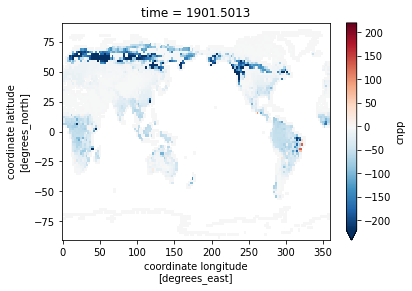

In [20]:
# MIMICScn-MIMICSc, gC/m2/y
(365*(MIMcnANN['cnpp'].isel(time=0)-MIMcANN['cnpp'].isel(time=0))).plot(robust=True);

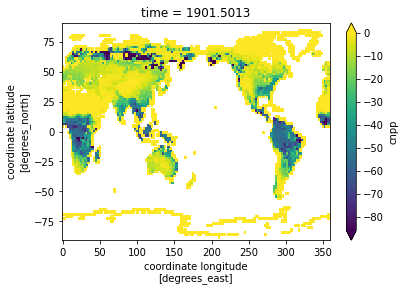

In [21]:
# CASAcn-MIMICSc, gC/m2/y
(365*(CAScnANN['cnpp'].isel(time=0)-MIMcANN['cnpp'].isel(time=0))).plot(robust=True);

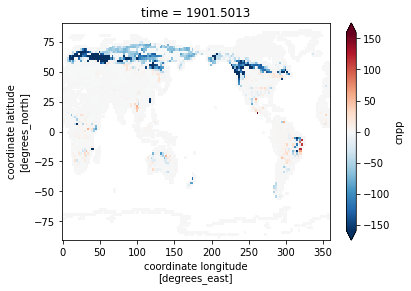

In [22]:
# initial NPP differences (MIMICScn-MIMICSc)
(365*(MIMcnANN['cnpp'].isel(time=0)-CAScnANN['cnpp'].isel(time=0))).plot(robust=True);

In [23]:
# Generate a function for making panel plots of maps
def map_function(da, cb=0, panel=None, cmap=None, ax=None, 
                 title=None, vmax=None, vmin=None):
    '''a function to make one subplot'''
    wrap_data, wrap_lon = add_cyclic_point(da.values, coord=da.lon)

    if ax is None: ax = plt.gca()
    im = ax.pcolormesh(wrap_lon,da.lat,wrap_data,
                   transform=ccrs.PlateCarree(),
                   vmax=vmax,vmin=vmin,cmap=cmap)
    ax.set_title(title)
    ax.coastlines()
    ax.set_extent([-180,180,-65,80], crs=ccrs.PlateCarree())
    ax.annotate(panel, xy=(0.05, 0.95), xycoords=ax.transAxes,
                ha='center', va='center',fontsize=16)    

    # allows for different colorbars on each plot
    if cb == 1:
        fig.colorbar(im, ax=ax,shrink=0.40, pad=0, fraction = 0.1)

# strings for labeling panels
panel = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)']  

Change 2014-1901


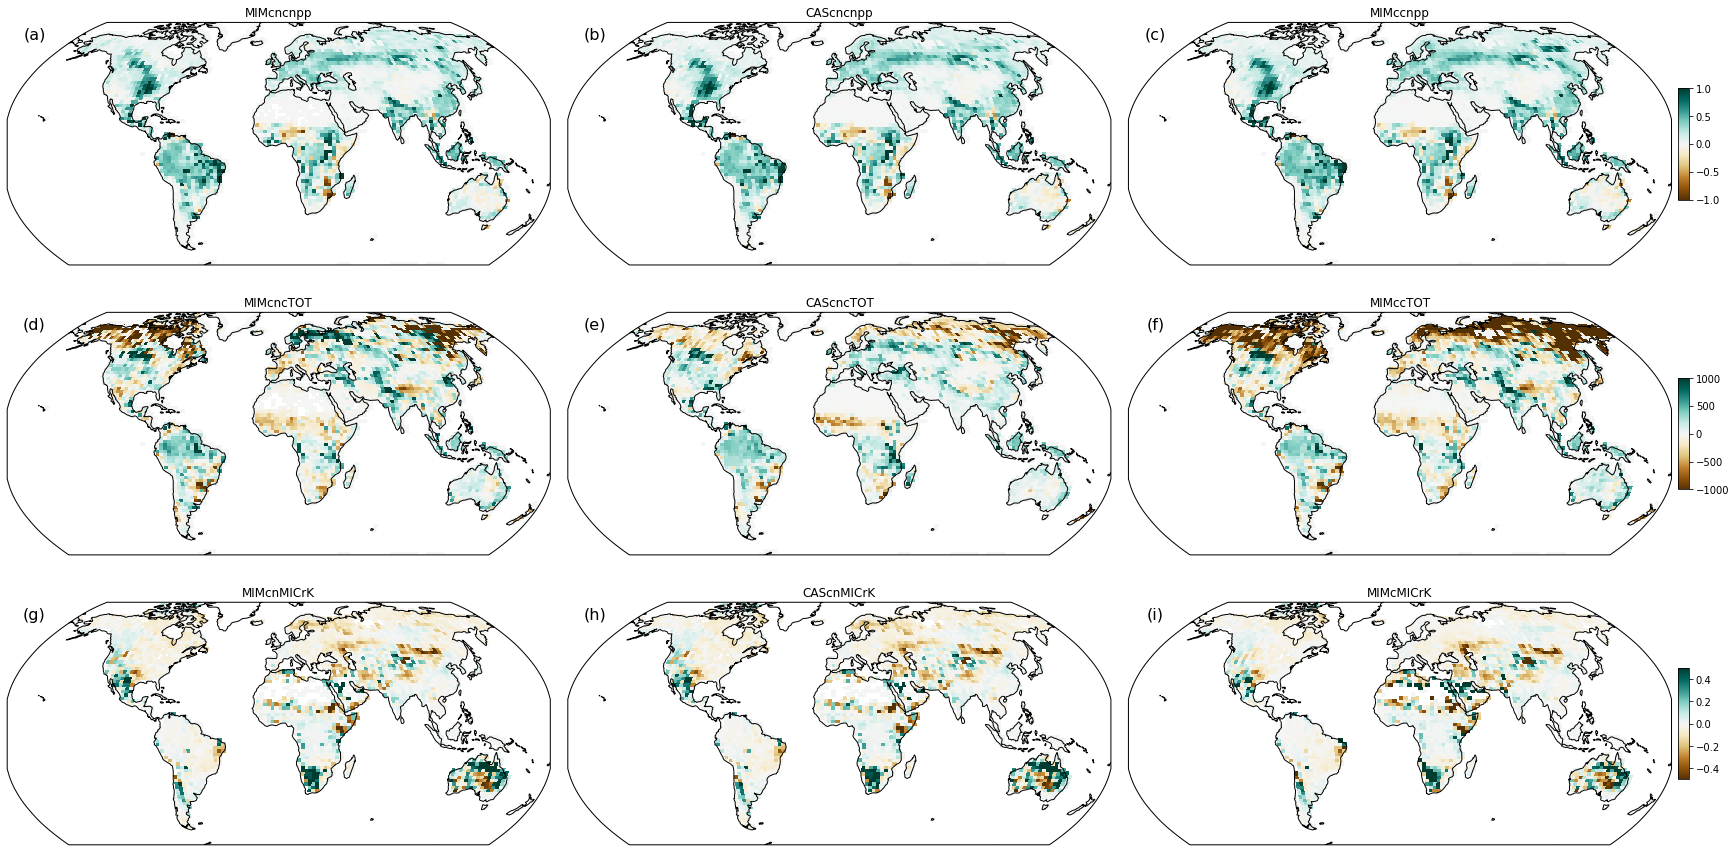

In [24]:
print('Change 2014-1901')
var = ['cnpp','cTOT','MICrK']
fig, axes = plt.subplots(nrows=len(var), ncols=3, figsize=(24,(4*len(var)) ), 
                         constrained_layout=True,
                         subplot_kw=dict(projection=ccrs.Robinson()))
k=0
vmin = [-1,-1e3,-0.5]
vmax = [ 1, 1e3,0.5]
cb = [0,0,1]
for index, ax in np.ndenumerate(axes):
    i = index[0] #rows, for variables
    j = index[1] #colums, for models
    # there are various ways to do this part, index in this case is a tuple (ie `(0, 0)`)
    if j == 0: da = (MIMcnANN[var[i]].isel(time=-1)-MIMcnANN[var[i]].isel(time=0))
    if i < 2:
        if j == 1: da = (CAScnANN[var[i]].isel(time=-1)-CAScnANN[var[i]].isel(time=0))
    if j == 2: da = (MIMcANN[var[i]].isel(time=-1)-MIMcANN[var[i]].isel(time=0))

    map_function(da, panel=panel[k], ax=ax, title=model[j]+var[i], cb=cb[j], cmap='BrBG',vmax=vmax[i], vmin=vmin[i])
    k=k+1

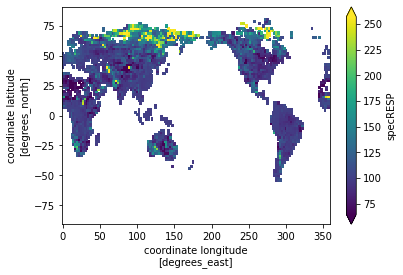

In [25]:
var = ['specRESP','cnMIC','MICrK']
(100*(MIMcnANN[var[0]].isel(time=-1)/MIMcnANN[var[0]].isel(time=0))).plot(robust=True);

lower specific respiration 


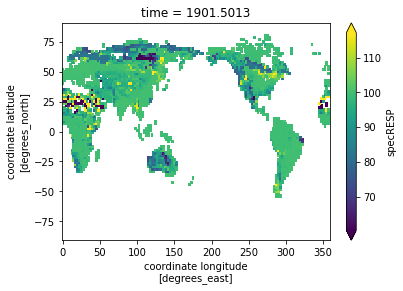

In [26]:
print('lower specific respiration ')
(100*(MIMcnANN[var[0]].isel(time=0)/MIMcANN[var[0]].isel(time=0))).plot(robust=True);

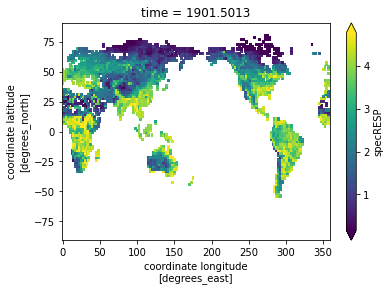

In [27]:
(365*MIMcnANN[var[0]].isel(time=0)).plot(robust=True);